In [1]:
import numpy as np
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [2]:
hockey = pd.read_csv('/users/krisstenglein/desktop/HockeyData.csv')
hockey.head()

,#,DOB,Birth City,S/P,Nat,HT,Wt,S,Draft,Round,...,Rk,Age,First Name,Last Name,End Team,Pos,GP,G,A,PTS
0,20.0,1988-02-17,Ottawa,ON,CAN,72,215,L,NaN,NaN,...,NaN,27,Victor,Bartley,MTL,D,10,0,0,0
1,22.0,1990-09-13,Trail,BC,CAN,70,184,R,2010.0,4.0,...,NaN,25,Craig,Cunningham,ARI,W,10,0,1,1
2,71.0,1991-06-08,Keswick,ON,CAN,72,193,L,NaN,NaN,...,Y,24,Joel,Hanley,MTL,D,10,0,6,6
3,48.0,1993-09-23,Helsinki,NaN,FIN,75,198,L,2012.0,6.0,...,Y,22,Petteri,Lindbohm,STL,D,10,0,0,0
4,39.0,1994-09-16,Longueuil,QC,CAN,77,214,L,2013.0,1.0,...,Y,21,Anthony,Mantha,DET,W,10,2,1,3


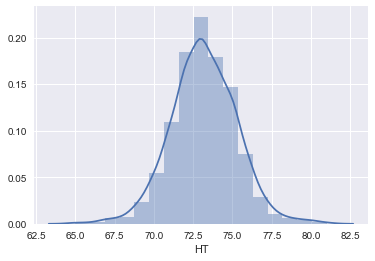

Seems like a pretty normal distribution


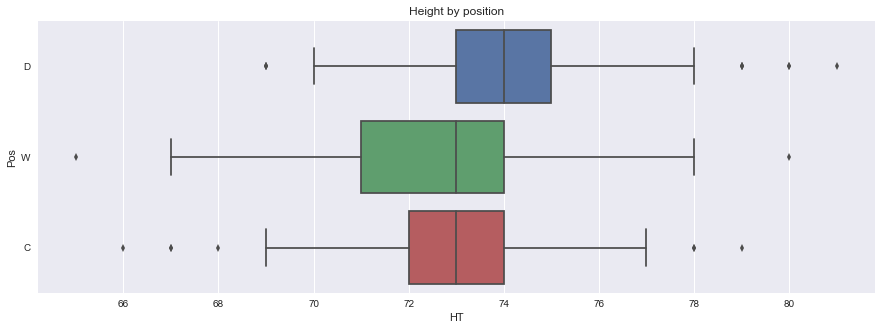

Wingers seem to have the widest range in heights while Defensemen are the biggest 
players in the league on average


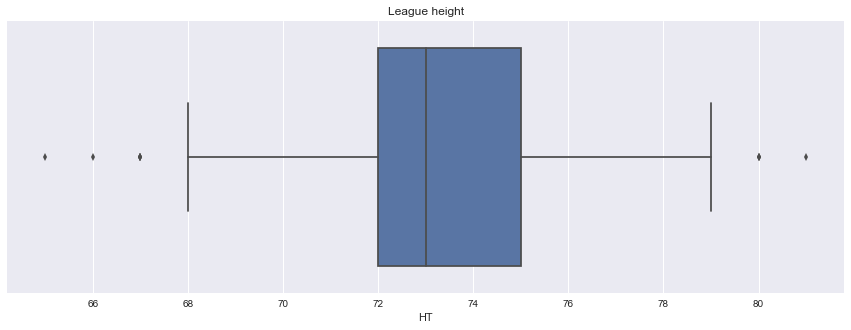

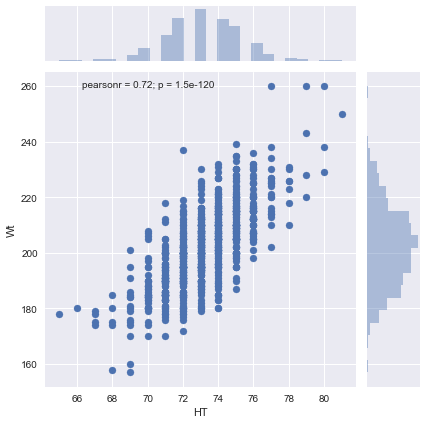

There is an issue with the gaps in the height histogram but I don't believe they can
be fixed due to the descrete nature of the plot


In [3]:
# Plotting 'height' data in 4 different ways

# A histogram
sns.distplot(hockey['HT'], bins = 17)
plt.show()
print('Seems like a pretty normal distribution')

# Comparing heights by position
plt.figure(figsize=(15,5))
sns.boxplot(x = hockey['HT'], y = hockey['Pos'])
plt.title('Height by position')
plt.show()
print('''Wingers seem to have the widest range in heights while Defensemen are the biggest 
players in the league on average''')

# And a look at the league as a whole
plt.figure(figsize=(15,5))
sns.boxplot(hockey['HT'])
plt.title('League height')
plt.show()

#The last look is a jointplot comparing height and weight
sns.jointplot(x = 'HT', y = 'Wt', data = hockey)
plt.show()
print('''There is an issue with the gaps in the height histogram but I don\'t believe they can
be fixed due to the descrete nature of the plot''')

<><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><>

In [4]:
# Plotting two continuous variables in 3 different ways (centimeters and pounds)

fnames = pd.read_csv('FakeNames.csv')
fnames.head()

,Gender,GivenName,Age,Color,Pounds,Centimeters,City,State
0,male,James,22,Blue,154.9,169,Farmington,NM
1,male,John,20,Blue,141.7,179,New Brunswick,NJ
2,male,Timothy,18,Green,196.9,165,Rahway,NJ
3,male,Danny,20,Red,184.4,172,Logansport,IN
4,female,Stacey,20,Black,129.6,164,Pond,MO


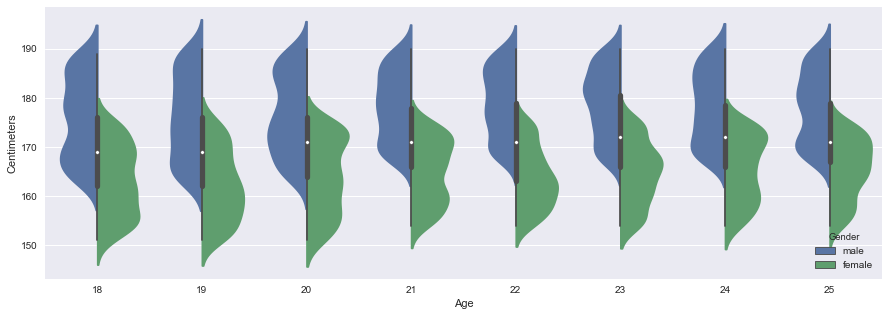

I really like this plot


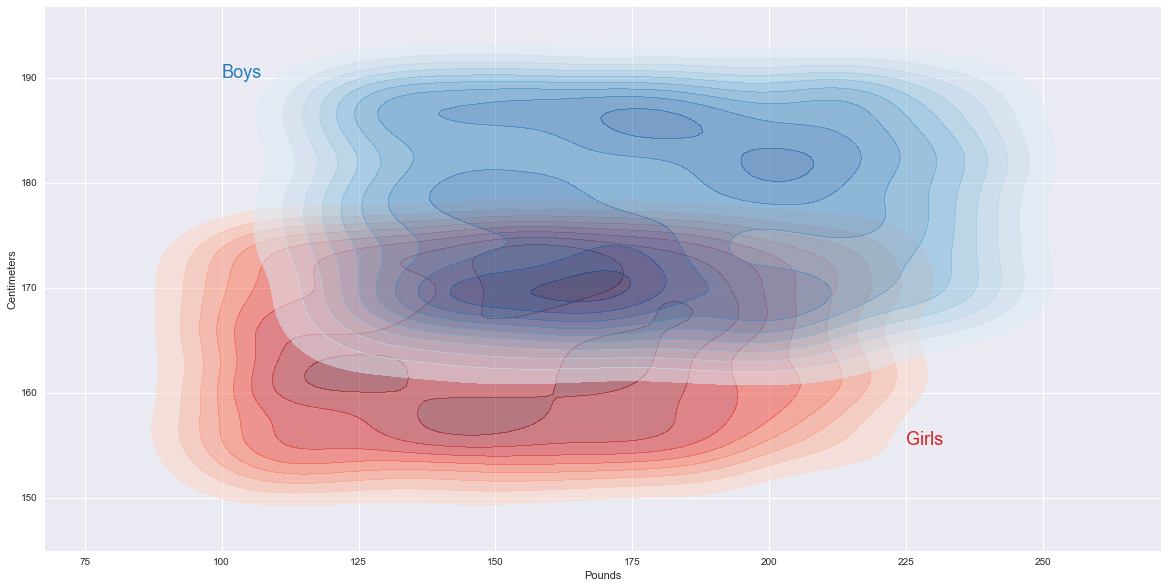

It was interesting to see the the differences\(and similarities\) of the heights and weights broken down by gender


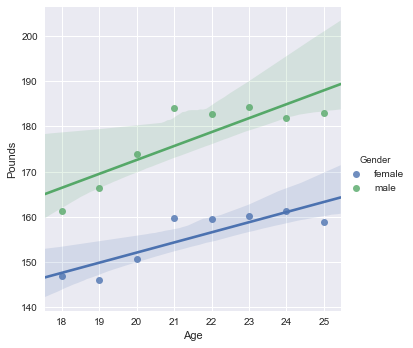

In [33]:
# First a violin plot comparing men and women in terms of height by ages
plt.figure(figsize=(15,5))
sns.violinplot(x='Age', y='Centimeters', hue='Gender', data = fnames, split = True)
plt.show()
print('I really like this plot')

# Now a heatmap looking at height and weight
sns.set(style="darkgrid")

girls = fnames.query("Gender == 'female'")
boys = fnames.query("Gender == 'male'")

f, ax = plt.subplots(figsize=(20,10))

ax = sns.kdeplot(girls.Pounds, girls.Centimeters,
                 cmap="Reds", shade=True, shade_lowest=False, alpha=.5)
ax = sns.kdeplot(boys.Pounds, boys.Centimeters,
                 cmap="Blues", shade=True, shade_lowest=False, alpha=.5)

red = sns.color_palette("Reds")[-2]
blue = sns.color_palette("Blues")[-2]
ax.text(100, 190, "Boys", size=18, color=blue)
ax.text(225, 155, "Girls", size=18, color=red)
plt.show()
print('It was interesting to see the the differences\(and similarities\) of the heights and weights broken down by gender')

#an lmplot showing weight by age split by gender
wt_by_age=fnames.groupby(['Gender', 'Age'])[['Pounds']].mean().reset_index()
sns.lmplot(x='Age', y='Pounds', hue='Gender', data=wt_by_age)
plt.show()

<><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><><>

Question 3 - Picking a continuous variable and a categorical variable and  plotting them six different ways in Seaborn

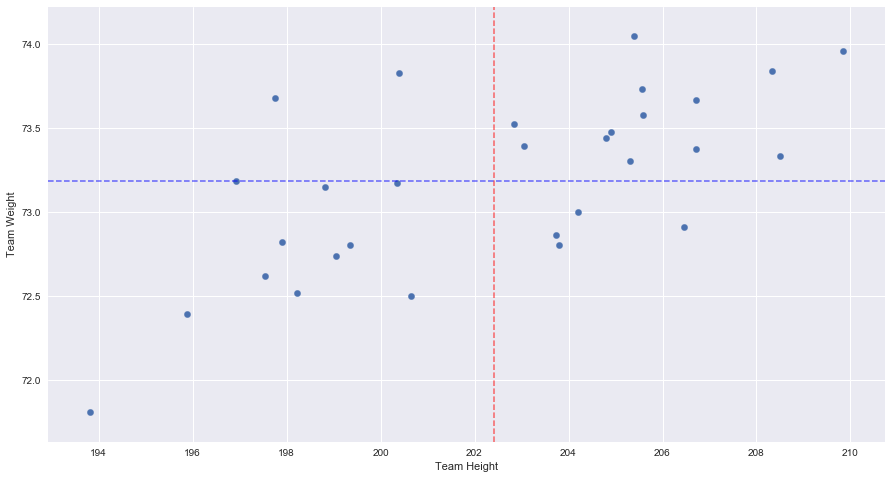

In [45]:
# Comparing average team weight to hit differential
h_teams=hockey.groupby('End Team')[['HT','Wt']].mean().reset_index()
plt.figure(figsize = (15,8))
plt.axvline(h_teams['Wt'].mean(), color = 'r', linestyle = '--', alpha=.5)
plt.axhline(h_teams['HT'].mean(), color = 'b', linestyle = '--', alpha=.5)
plt.xlabel('Team Height')
plt.ylabel('Team Weight')
plt.scatter(h_teams['Wt'], h_teams['HT'], s=40)
plt.show()

#